In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Data Cleaning</h1>

In [83]:
df = pd.read_csv("../data/StudentPerformanceFactors.csv")
print(df.info())

missing_cols = ["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]
for col in missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

<h1>Feature Encoding</h1>

<h1>Kaustuv</h1>

In [84]:
#  Parental_involvement,Motivation_Level,Teacher_Quality(Low=1,Medium=2,High=3)
print(df.Parental_Involvement.unique())
print(df.Motivation_Level.unique())
print(df.Teacher_Quality.unique())
ordinal_priority_map = {"Low": 1, "Medium": 2, "High": 3}
df["Parental_Involvement"] = df["Parental_Involvement"].replace(ordinal_priority_map)
df["Motivation_Level"] = df["Motivation_Level"].replace(ordinal_priority_map)
df["Teacher_Quality"] = df["Teacher_Quality"].replace(ordinal_priority_map)
df.Parental_Involvement.sample(3)
df.Motivation_Level.sample(3)
df.Teacher_Quality.sample(3)

<StringArray>
['Low', 'Medium', 'High']
Length: 3, dtype: str
<StringArray>
['Low', 'Medium', 'High']
Length: 3, dtype: str
<StringArray>
['Medium', 'High', 'Low']
Length: 3, dtype: str


1796    1
2791    1
6539    3
Name: Teacher_Quality, dtype: object

In [85]:
# Access_to_Resources,Family_Income(Low=1,Medium=2,High=3),Parental_Education_Level(High School=1,college=2,postgraduate=3)
print(df.Access_to_Resources.unique())
print(df.Family_Income.unique())
print(df.Parental_Education_Level.unique())

df["Access_to_Resources"] = df["Access_to_Resources"].replace(ordinal_priority_map)
df["Family_Income"] = df["Family_Income"].replace(ordinal_priority_map)
df["Parental_Education_Level"] = df["Parental_Education_Level"].replace(
    {"High School": 1, "College": 2, "Postgraduate": 3}
)

<StringArray>
['High', 'Medium', 'Low']
Length: 3, dtype: str
<StringArray>
['Low', 'Medium', 'High']
Length: 3, dtype: str
<StringArray>
['High School', 'College', 'Postgraduate']
Length: 3, dtype: str


In [86]:
# Extracurricular_Activities,Internet_Access,Learning_Disabilities(Yes=1,No=0),
print(df.Extracurricular_Activities.unique())
print(df.Internet_Access.unique())
ys = {
    'Yes': 1,
    'No':0
}
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].replace(ys)
df["Internet_Access"] = df["Internet_Access"].replace(ys)
df["Learning_Disabilities"] = df["Learning_Disabilities"].replace(ys)

<StringArray>
['No', 'Yes']
Length: 2, dtype: str
<StringArray>
['Yes', 'No']
Length: 2, dtype: str


In [87]:
# Peer_Influence(Negative=1,Neutral=2,Positive=3),Distance_from_Home(Near=1,Moderate=2,Far=3)
# print(df.Gender.unique())
print(df.Peer_Influence.unique())
print(df.Distance_from_Home.unique())
df["Peer_Influence"] = df["Peer_Influence"].replace(
    {"Negative": 1, "Neutral": 2, "Positive": 3}
)
df["Distance_from_Home"] = df["Distance_from_Home"].replace(
    {"Near": 1, "Moderate": 2, "Far": 3}
)
df[["Peer_Influence", "Distance_from_Home"]].sample(3)

<StringArray>
['Positive', 'Negative', 'Neutral']
Length: 3, dtype: str
<StringArray>
['Near', 'Moderate', 'Far']
Length: 3, dtype: str


,Peer_Influence,Distance_from_Home
1046,2,1
5846,1,1
614,1,2


<h1>Anjal</h1>

In [88]:
# Anjal's Code
print(df.School_Type.unique())
print(df.Gender.unique())

<StringArray>
['Public', 'Private']
Length: 2, dtype: str
<StringArray>
['Male', 'Female']
Length: 2, dtype: str


In [89]:
# School_Type and Gender mapping
# School_Type-> Public-0, Private-1
df["School_Type"] = df["School_Type"].replace({"Public": 0, "Private": 1})
# Gender-> Female-0, Male-1
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

In [90]:
df[['School_Type','Gender']].sample(3)
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                    1                   3   
1             19          64                    1                   2   
2             24          98                    2                   2   
3             29          89                    1                   2   
4             19          92                    2                   2   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                          0            7               73                1   
1                          0            8               59                1   
2                          1            7               91                2   
3                          1            8               98                2   
4                          1            6               65                2   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0               

<h2>Duplicate Removal</h2>

In [91]:
duplicate_count = df.duplicated().sum()
print(f"I found {duplicate_count} duplicate rows.")
df.drop_duplicates(inplace=True)

I found 0 duplicate rows.


<h2>Missing Value Audit</h2>

In [92]:
# The Missing Value Audit
missing_data = df.isnull().sum()
print("--- Missing Values Per Column ---")
print(missing_data)

# A quick check for the Lead
if missing_data.sum() == 0:
    print("\n✅ Audit Complete: No missing values found. Data is safe for ML.")
else:
    print("\n⚠️ Warning: Missing values detected. We need to fill or drop them.")

--- Missing Values Per Column ---
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

✅ Audit Complete: No missing values found. Data is safe for ML.


<h1>Data Visualization</h1>

Parental_Involvement          int64
Motivation_Level              int64
Teacher_Quality               int64
Access_to_Resources           int64
Family_Income                 int64
Parental_Education_Level      int64
Extracurricular_Activities    int64
Internet_Access               int64
Learning_Disabilities         int64
Peer_Influence                int64
Distance_from_Home            int64
School_Type                   int64
Gender                        int64
dtype: object


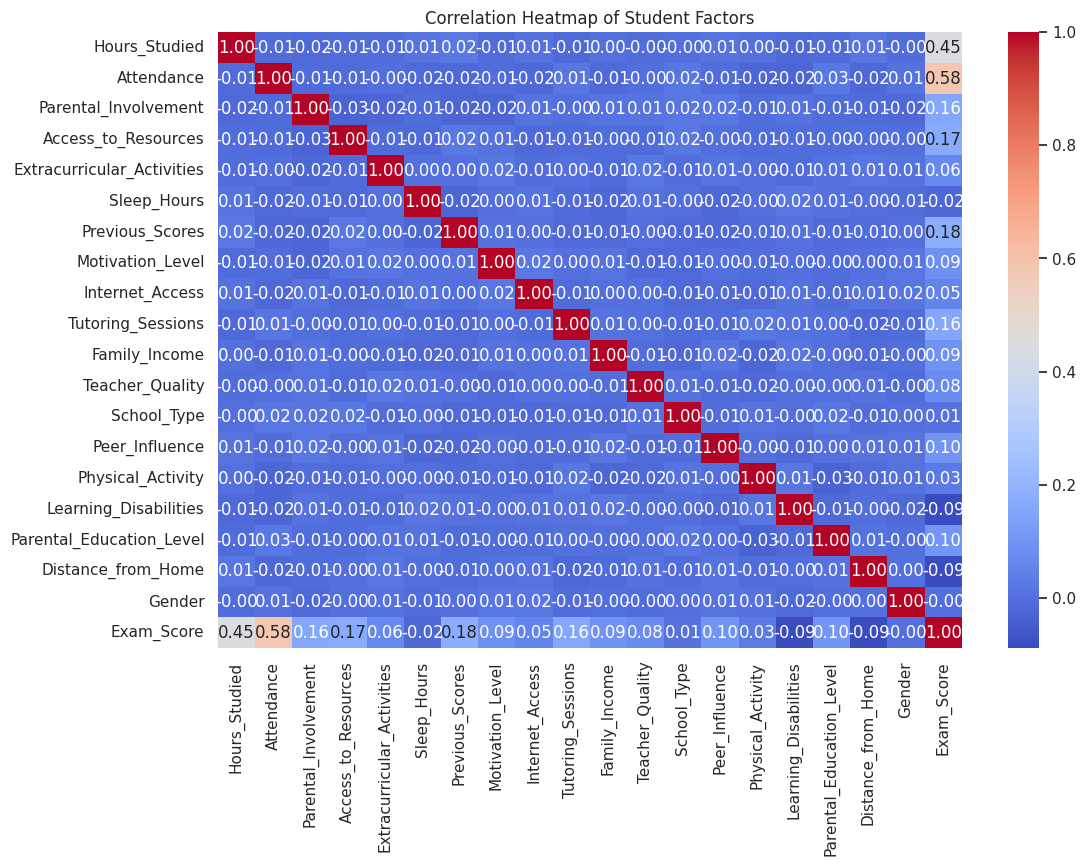

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Influence              6607 non-null   int64
 14  Physical_Activity  

In [93]:
encoded_cols = [
    "Parental_Involvement",
    "Motivation_Level",
    "Teacher_Quality",
    "Access_to_Resources",
    "Family_Income",
    "Parental_Education_Level",
    "Extracurricular_Activities",
    "Internet_Access",
    "Learning_Disabilities",
    "Peer_Influence",
    "Distance_from_Home",
    "School_Type",
    "Gender",
]
df[encoded_cols] = df[encoded_cols].apply(pd.to_numeric, errors="coerce")
print(df[encoded_cols].dtypes)
sns.set_theme(style="whitegrid")
# Create a heatmap for numerical features
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Student Factors")
plt.show()
print(df.info())